# Correlation Analysis

# Test Dataset 

data1: mean=100.776 stdv=19.620
data2: mean=151.050 stdv=22.358


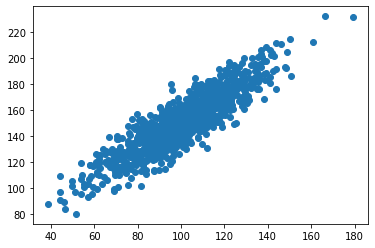

In [1]:
# generate related variables
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot

# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# summarize
print("data1: mean=%.3f stdv=%.3f" % (mean(data1), std(data1)))
print("data2: mean=%.3f stdv=%.3f" % (mean(data2), std(data2)))
# plot
pyplot.scatter(data1, data2)
pyplot.show()

# Covariance

cov(X, Y) = (sum (x - mean(X)) * (y - mean(Y)) ) * 1/(n-1)

In [2]:
# calculate the covariance between two variables
from numpy.random import randn
from numpy.random import seed
from numpy import cov

# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# calculate covariance matrix
covariance = cov(data1, data2)
print(covariance)

[[385.33297729 389.7545618 ]
 [389.7545618  500.38006058]]


# Pearson’s Correlation


Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))

In [3]:
# calculate the Pearson's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr

# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print("Pearsons correlation: %.3f" % corr)

Pearsons correlation: 0.888


# Spearman’s Correlation

Spearman's correlation coefficient = covariance(rank(X), rank(Y)) / (stdv(rank(X)) * stdv(rank(Y)))

In [4]:
# calculate the spearmans's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import spearmanr

# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# calculate spearman's correlation
corr, _ = spearmanr(data1, data2)
print("Spearmans correlation: %.3f" % corr)

Spearmans correlation: 0.872


# Correlation Analysis From a dataset

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("House Price.csv")
data.shape

(1460, 81)

In [7]:
data["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:ylabel='Frequency'>

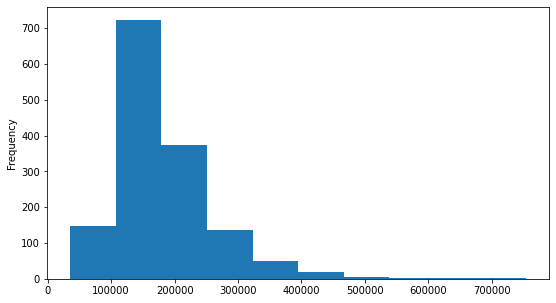

In [8]:
plt.figure(figsize=(9, 5))
data["SalePrice"].plot(kind="hist")

<AxesSubplot:>

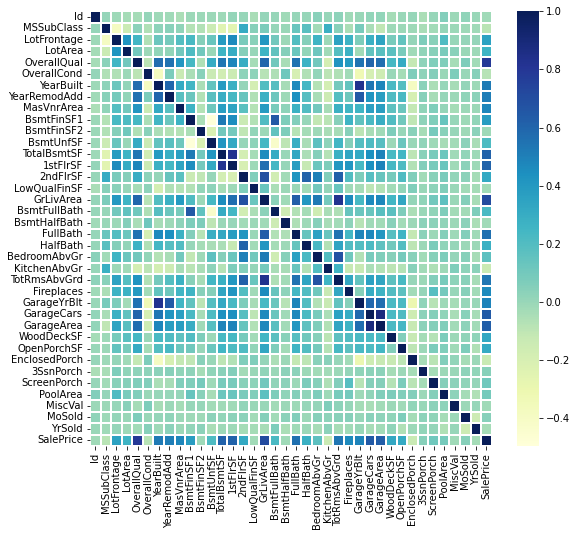

In [9]:
# correlation Matrix
corrmat = data.corr()

f, ax = plt.subplots(figsize=(9, 8))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1)

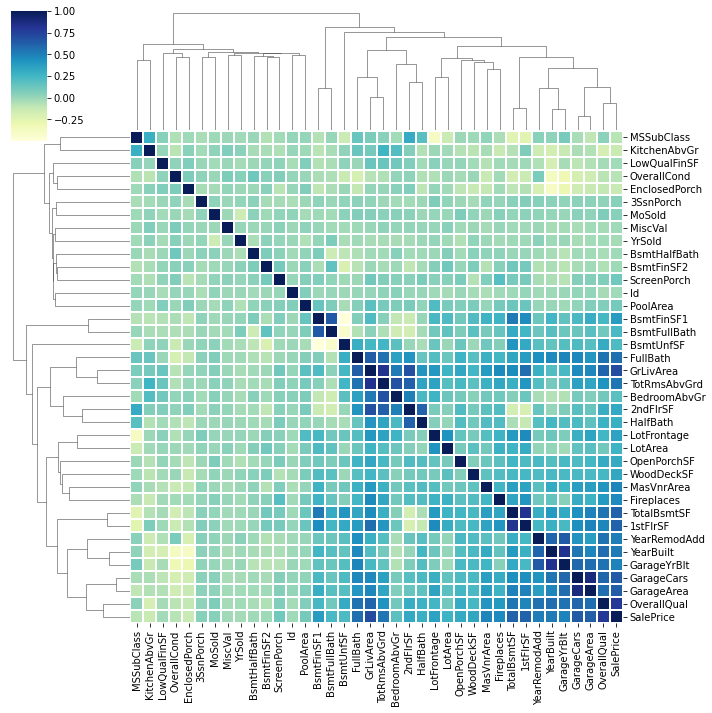

In [10]:
# grid Correlation Matrix
corrmat = data.corr()

cg = sns.clustermap(corrmat, cmap="YlGnBu", linewidths=0.1)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

cg

<AxesSubplot:>

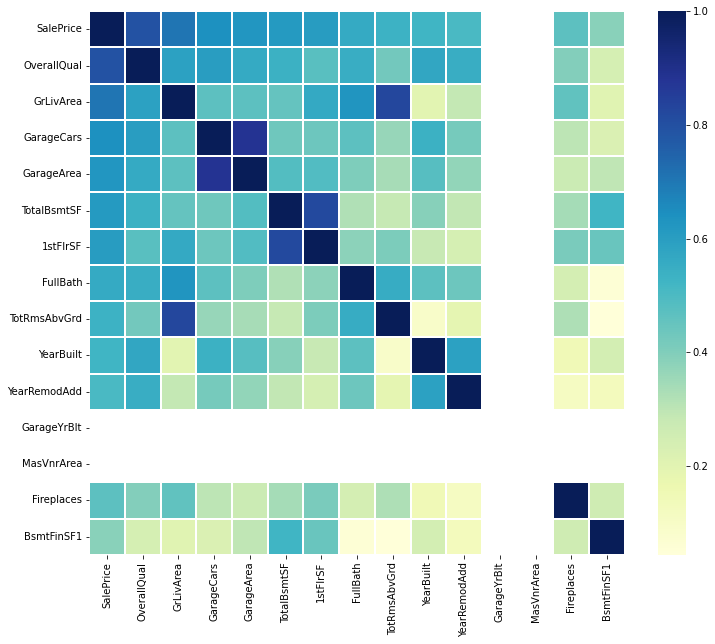

In [11]:
# Correlation for Saleprice
# saleprice correlation matrix
# k : number of variables for heatmap
k = 15

cols = corrmat.nlargest(k, "SalePrice")["SalePrice"].index

cm = np.corrcoef(data[cols].values.T)
f, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(
    cm,
    ax=ax,
    cmap="YlGnBu",
    linewidths=0.1,
    yticklabels=cols.values,
    xticklabels=cols.values,
)

# Example 2

In [12]:
from bioinfokit import analys, visuz

ModuleNotFoundError: No module named 'bioinfokit'

In [ ]:
df = analys.get_data("corr").data

In [ ]:
df.head()

,geneid,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R
0,gene_11788,0.530955,0.0,0.452218,0.0,-0.081783,0.0,0.600653,0.0,0.592926,0.0,-0.006403,0.0,-0.055837,0.0,0.016365,0.0,0.035935,0.0
1,gene_3172,-0.100497,0.0,0.082000,0.0,0.188021,0.0,0.881326,0.0,0.791600,0.0,-0.091229,0.0,0.655970,0.0,-0.181619,0.0,-0.877352,0.0
2,gene_10568,-0.037399,0.0,-0.124216,0.0,-0.082652,0.0,-0.290439,0.0,-0.366393,0.0,-0.079134,0.0,-0.063393,0.0,-0.251791,0.0,-0.227313,0.0
3,gene_7250,0.530852,0.0,1.311357,0.0,0.157159,0.0,1.738840,0.0,2.096964,0.0,0.314536,0.0,3.331255,0.0,4.121092,0.0,0.536099,0.0
4,gene_9644,-0.034391,0.0,-0.405833,0.0,-0.301649,0.0,1.573004,0.0,1.711126,0.0,0.139358,0.0,0.329918,0.0,3.076992,0.0,2.691966,0.0


In [ ]:
df = df.drop("geneid", 1)
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R
0,0.530955,0.0,0.452218,0.0,-0.081783,0.0,0.600653,0.0,0.592926,0.0,-0.006403,0.0,-0.055837,0.0,0.016365,0.0,0.035935,0.0
1,-0.100497,0.0,0.082000,0.0,0.188021,0.0,0.881326,0.0,0.791600,0.0,-0.091229,0.0,0.655970,0.0,-0.181619,0.0,-0.877352,0.0
2,-0.037399,0.0,-0.124216,0.0,-0.082652,0.0,-0.290439,0.0,-0.366393,0.0,-0.079134,0.0,-0.063393,0.0,-0.251791,0.0,-0.227313,0.0
3,0.530852,0.0,1.311357,0.0,0.157159,0.0,1.738840,0.0,2.096964,0.0,0.314536,0.0,3.331255,0.0,4.121092,0.0,0.536099,0.0
4,-0.034391,0.0,-0.405833,0.0,-0.301649,0.0,1.573004,0.0,1.711126,0.0,0.139358,0.0,0.329918,0.0,3.076992,0.0,2.691966,0.0


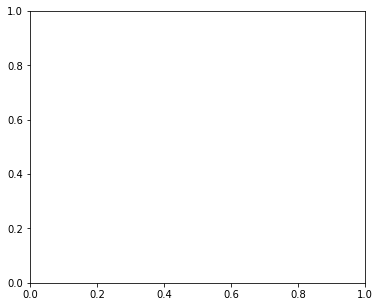

In [ ]:
visuz.stat.corr_mat(df=df)

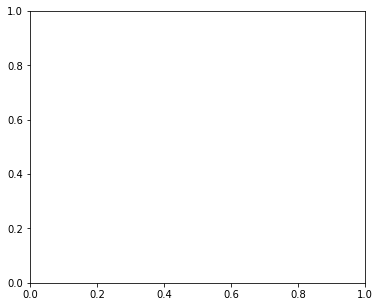

In [ ]:
visuz.stat.corr_mat(df=df, cmap="RdBu")

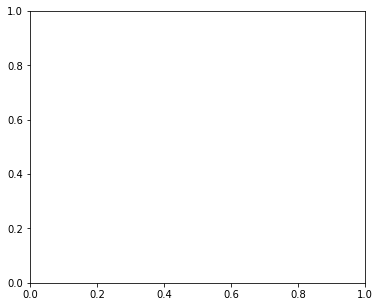

In [ ]:
visuz.stat.corr_mat(
    df=df, cmap="RdBu", figtype="svg", axtickfontsize="10", axtickfontname="Verdana"
)

# Example 3

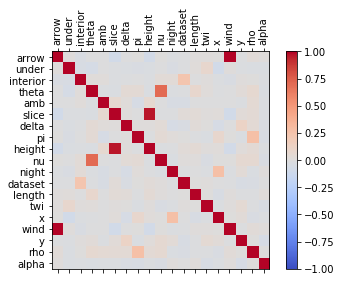

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(
    "https://www.dropbox.com/s/4jgheggd1dak5pw/data_visualization.csv?raw=1",
    index_col=0,
)
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, len(data.columns), 1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()